In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
import zipfile
import shutil

from keras import layers
from keras.models import Sequential
from keras.optimizers import RMSprop, Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, Callback, ModelCheckpoint

from sklearn.metrics import confusion_matrix, cohen_kappa_score
from sklearn.model_selection import train_test_split

from PIL import Image
from tqdm import tqdm

import cv2
# Any results you write to the current directory are saved as output.

In [7]:
BASE_PATH = '../../data/raw/'
TRAINING_DIR = "../../data/raw/train_images/"
TESTING_DIR = "../../data/raw/test_images/"

print(os.listdir(BASE_PATH),'\n')

print('Directory Information: ', os.listdir(BASE_PATH), '\n')
print('Training Directory 5 First Files: ', os.listdir(TRAINING_DIR)[:5])
print('Test Directory 5 First Files: ',os.listdir(TESTING_DIR)[:5])

['.gitkeep', 'aptos2019-blindness-detection.zip', 'sample_submission.csv', 'test.csv', 'test_images', 'test_images.zip', 'train.csv', 'train_images', 'train_images.zip'] 

Directory Information:  ['.gitkeep', 'aptos2019-blindness-detection.zip', 'sample_submission.csv', 'test.csv', 'test_images', 'test_images.zip', 'train.csv', 'train_images', 'train_images.zip'] 

Training Directory 5 First Files:  ['000c1434d8d7.png', '001639a390f0.png', '0024cdab0c1e.png', '002c21358ce6.png', '005b95c28852.png']
Test Directory 5 First Files:  ['0005cfc8afb6.png', '003f0afdcd15.png', '006efc72b638.png', '00836aaacf06.png', '009245722fa4.png']


In [8]:
# Read the datasets for the model construction
train = pd.read_csv(os.path.join(BASE_PATH, 'train.csv'))
test = pd.read_csv(os.path.join(BASE_PATH, 'test.csv'))
submit = pd.read_csv(os.path.join(BASE_PATH, 'sample_submission.csv'))

print('The training dataset shape is : ',train.shape)
print('The testing dataset shape is  : ',test.shape)

The training dataset shape is :  (3662, 2)
The testing dataset shape is  :  (1928, 1)


In [9]:
# Display some basic information from the dataset.
print('Train dataset information:', '\n')
train.info()

Train dataset information: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3662 entries, 0 to 3661
Data columns (total 2 columns):
id_code      3662 non-null object
diagnosis    3662 non-null int64
dtypes: int64(1), object(1)
memory usage: 57.3+ KB


In [10]:
# Display the first 5 rows from the selected dataset.
print('Train dataset rows example:', '\n')
train.head()

Train dataset rows example: 



,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0


In [11]:
# Display the first 5 rows from the selected dataset.
print('Train dataset rows example:', '\n')
test.head()

Train dataset rows example: 



,id_code
0,0005cfc8afb6
1,003f0afdcd15
2,006efc72b638
3,00836aaacf06
4,009245722fa4


Image Id:: d85a842d20bd // Diagnosis :: 2


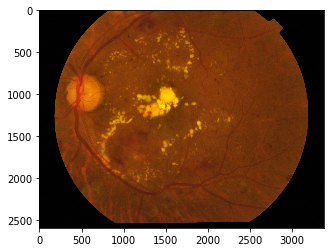

In [24]:
# Display one of the training set images. '002c21358ce6'.
BASE_PATH_TRAINING = os.path.join(BASE_PATH, 'train_images/')
id_code = list(train['id_code'].sample(10))
id_code = str(id_code[0])
img_path = BASE_PATH_TRAINING + id_code + ".png"

diagnosis = int(train[train.id_code == id_code].diagnosis)
print('Image Id:: {} // Diagnosis :: {}'.format(id_code, diagnosis))
img = mpimg.imread(img_path)
plt.imshow(img)
plt.show()

In [26]:
# Model Hyperparameters
BATCH_SIZE = 32 # Batch size during training
TEST_BATCH_SIZE = 1 # Batch size during testing
EPOCHS = 25
VERBOSE = 1
IMAGE_SIZE = 244
HEIGHT = IMAGE_SIZE
WIDTH = IMAGE_SIZE
NUM_CLASSES = 5
LEARNING_RATE = 5e-5
LAYERS_BACK_FROM_LAST = 5
CHANNELS  = 3 
EARLY_STOPPING_PATIENCE = 10
RLROP_PATIENCE = 5
DECAY_DROP = 0.5 # Learning Rate Drop Factor in Percentage
MINIMUN_LR = 1e-7
VALIDATION_SPLIT = 0.10
RANDOM_STATE = 42